In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import the other jupyter notebook

In [4]:
import import_ipynb # pip install import_ipynb
import module_making

importing Jupyter notebook from module_making.ipynb


In [5]:
df = pd.read_csv('AirPassengers.csv', names=['Month', 'Passengers'], header=0)
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
df.shape

(144, 2)

In [7]:
df.isna().sum()

Month         0
Passengers    0
dtype: int64

In [8]:
df.dtypes

Month         object
Passengers     int64
dtype: object

In [9]:
# convert object to date-time & set it as index

In [10]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True) # date should be index in time series data

In [11]:
# check stationarity

(0.8153688792060423, 0.9918802434376409, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.6929308390189) 

test statistics:      0.815369
p-value:              0.991880
lags-used:           13.000000
no. of obs used:    130.000000
dtype: float64

 critical value:  1% => -3.4816817173418295

 critical value:  5% => -2.8840418343195267

 critical value:  10% => -2.578770059171598


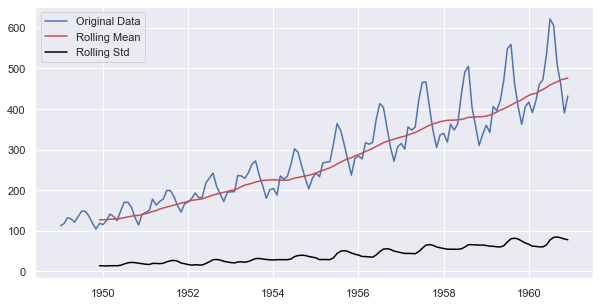

In [12]:
sns.set()
module_making.ts(df) # rolling-satistics & dickey-fuller test

In [ ]:
'''
as we can see the p-value > 0.05
also, from the graph we can see that mean is also not constant (increasing trend)
=> hence data is not stationary
'''

In [13]:
# make the data stationary

,Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


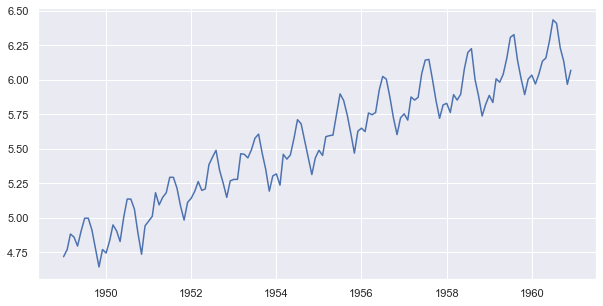

In [14]:
log_df = np.log(df)

fig = plt.figure(figsize=(10, 5)); 
plt.plot(log_df);

log_df.head()

(-1.7170170891069714, 0.4223667747703857, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, -445.3990312497209) 

test statistics:     -1.717017
p-value:              0.422367
lags-used:           13.000000
no. of obs used:    130.000000
dtype: float64

 critical value:  1% => -3.4816817173418295

 critical value:  5% => -2.8840418343195267

 critical value:  10% => -2.578770059171598


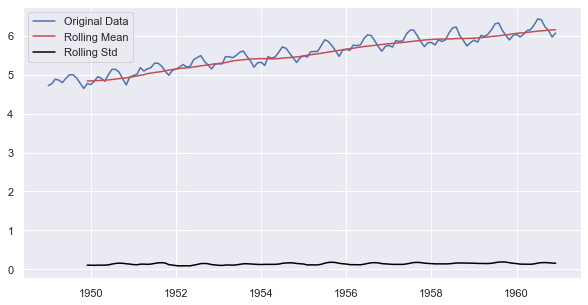

In [15]:
# checking stationary
module_making.ts(log_df)
# still not stationary, as we can see from the graph below

In [16]:
# differencing

In [17]:
lag_2 = log_df.shift(periods=2) # first tried for periods=1 (lag_1)
display(
    log_df.head(),
    lag_2.head()
)

,Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,4.718499
1949-04-01,4.770685
1949-05-01,4.882802


In [18]:
shifted_df = log_df - lag_2
print(shifted_df.head())
shifted_df.dropna(inplace=True) 

            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01    0.164303
1949-04-01    0.089128
1949-05-01   -0.087011


(-3.1679073752887454, 0.021919114564038708, 11, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, -431.93712963284486) 

test statistics:     -3.167907
p-value:              0.021919
lags-used:           11.000000
no. of obs used:    130.000000
dtype: float64

 critical value:  1% => -3.4816817173418295

 critical value:  5% => -2.8840418343195267

 critical value:  10% => -2.578770059171598


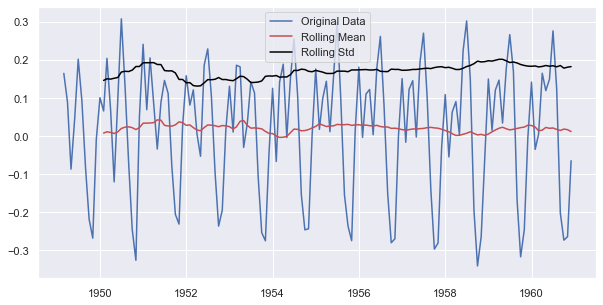

In [19]:
# checking stationary
module_making.ts(shifted_df)

In [20]:
# stationary data achieved

In [21]:
# ARIMA

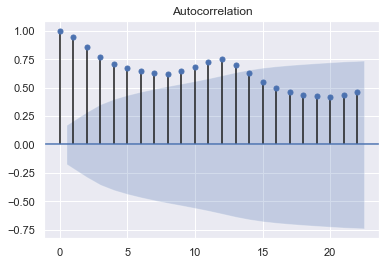

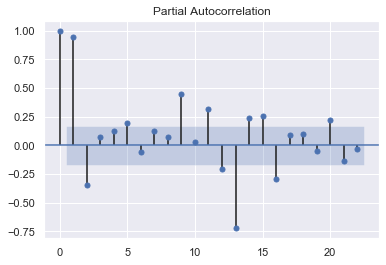

In [22]:
X = df[:130]
y = df[130:]

module_making.acf_pacf_plots(X)

In [ ]:
'''
ACF  => Moving Average (q) 
     => how many days should be taken into consideration in order to make prediction for the next day
     => we choose the values out of the significant zone
     => as per the graph, the values from 0 to 10/11
PACF => Auto Regression (p)
     => as per the graph, the most significant values of p are 0, 1, 13 (or also 2, 9, 11, 16)
'''

In [ ]:
# train the model

,Mean Absolute Error,Mean_Squared_Error,Mean_Absolute_Percentage_Error,Root_Mean_Squared_Error
Values,11.625005,217.225277,2.557016,14.738564


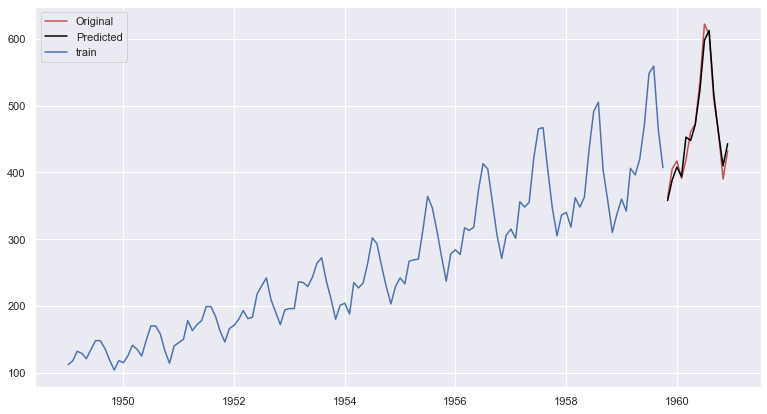

In [23]:
from statsmodels.tsa.arima_model import ARIMA # pip install statsmodels==0.11.0rc1

model = ARIMA(X, order=(13, 2, 0)) # p,a,q
res = model.fit()
pred = res.predict(start=y.index[0], end=y.index[-1], typ='levels')
# levels give the result back on the same scale

df_pred = pd.DataFrame({'Actual':y.Passengers, 'Predicted':pred}) 
# creating a new dataframe to visualize the graph
fig = plt.figure(figsize=(13, 7));
plt.plot(df_pred.Actual, color='r', label='Original')
plt.plot(df_pred.Predicted, color='black', label='Predicted')
plt.plot(X.Passengers, color='b', label='train')
plt.legend();

module_making.evaluate_forecast(y.Passengers, pred) # to check results
# MAPE (2.55) => if the value is 100, the predicted value can be 102.55 or 97.45

In [24]:
df_pred

,Actual,Predicted
1959-11-01,362,357.872248
1959-12-01,405,388.469940
1960-01-01,417,407.818085
1960-02-01,391,393.815673
1960-03-01,419,452.737060
1960-04-01,461,447.757827
1960-05-01,472,470.909894
1960-06-01,535,522.848019
1960-07-01,622,597.680919
1960-08-01,606,612.517759


In [80]:
# feeding data using log transformation but not differencing

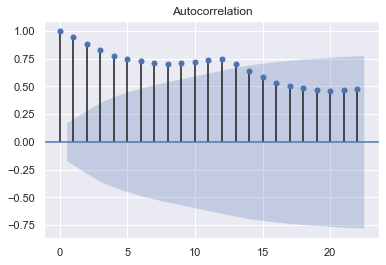

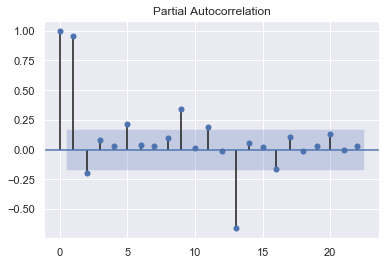

In [25]:
X_log = log_df[:130]
y_log = log_df[130:]

module_making.acf_pacf_plots(X_log)

,Mean Absolute Error,Mean_Squared_Error,Mean_Absolute_Percentage_Error,Root_Mean_Squared_Error
Values,12.960529,252.351314,2.876909,15.885569


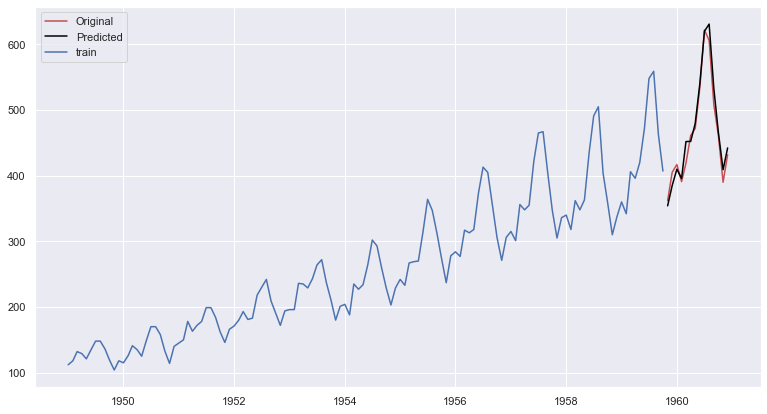

In [26]:
from statsmodels.tsa.arima_model import ARIMA 

model = ARIMA(X_log, order=(12, 2, 0)) # last 2 (q) means taking both (two) values
res = model.fit()
pred = res.predict(start=y_log.index[0], end=y_log.index[-1], typ='levels')
# levels give the result back on the same scale

df_pred = pd.DataFrame({'Actual': np.exp(y_log.Passengers), 'Predicted': np.exp(pred)}) 
# creating a new dataframe to visualize the graph
fig = plt.figure(figsize=(13, 7));
plt.plot(df_pred.Actual, color='r', label='Original')
plt.plot(df_pred.Predicted, color='black', label='Predicted')
plt.plot(np.exp(X_log.Passengers), color='b', label='train')
plt.legend();

module_making.evaluate_forecast(np.exp(y_log.Passengers), np.exp(pred)) # to check results

In [ ]:
# forecast

In [27]:
forecast = res.forecast(steps=12)
print(np.exp(forecast[0]))       # actual forecast values for the next 12 months
print('\n', np.exp(forecast[1])) # standard error
print('\n', np.exp(forecast[2])) # confidence interval (the range in which forecast[0] value will lie)

[354.06306655 384.83437579 409.87859093 395.80663647 451.98166722
 452.17640718 479.42370158 541.21139026 619.96861526 630.90380443
 532.75093726 465.9624211 ]

 [1.04133803 1.05139742 1.06085624 1.06971675 1.07622052 1.08414358
 1.09043319 1.09701485 1.10200821 1.10809165 1.1131099  1.11914393]

 [[327.04045216 383.31849858]
 [348.82813201 424.55720511]
 [365.06428405 460.19418124]
 [346.83050031 451.69872124]
 [391.3771629  521.97074043]
 [385.95709445 529.75707962]
 [404.6007628  568.08366857]
 [451.38992581 648.90630516]
 [512.49420226 749.98133094]
 [515.93669059 771.48924994]
 [431.82853093 657.25986316]
 [373.71128095 580.98588119]]
